# Data and Imports

In [3]:
%run Imports.ipynb
name = 'Kred'

key_featsubgroups = pd.read_pickle('../pickle/2_FS/' + name + '/key_featsubgroups.pkl')
# key_featsubgroups = pd.read_pickle('./pickle/2_FS/' + name + '/key_featsubgroups.pkl')
df = pd.read_pickle('../pickle/2_FS/' + name + '/2_df_new_.pkl')

c:\Users\benjf\anaconda3\envs\Work\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
print(df[target].value_counts()/df.shape[0])
print('df_shape: ', df.shape)

arrears
1   0.646
0   0.354
Name: count, dtype: float64
df_shape:  (129457, 418)


In [5]:
len(df.columns)

418

In [12]:
import sys
import os

# Get the parent directory and add it to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from Functions_ANOR_Ben import feature_importance

# Functions

In [6]:
def split_data_4(df, key_featsubgroups=key_featsubgroups, target=target, test_size=0.2, random_state=42):
    """
    Splits the dataset into training and testing sets while excluding demographic features.

    Parameters:
    df (DataFrame): The dataset containing features and target variable.
    key_featsubgroups (DataFrame): A mapping of feature subgroups.
    target (str): The name of the target variable.
    test_size (float, optional): The proportion of the dataset to allocate for testing. Default is 0.2.
    random_state (int, optional): Random seed for reproducibility. Default is 42.

    Returns:
    tuple: X_train, X_test, y_train, y_test (training and testing datasets)
    """

    # Extract demographic features
    demo_feat = key_featsubgroups.loc[key_featsubgroups['subgroup'] == 'demo', 'list_features'].values[0]
    print("Demographic Features:", demo_feat)

    # Separate features (X) and target variable (y), excluding demographic features
    X = df.drop(columns=[target] + demo_feat)
    y = df[target]

    # Split the dataset into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Print dataset shapes
    print(f"Training Features Shape: {X_train.shape}")
    print(f"Training Labels Shape: {y_train.shape}")
    print(f"Testing Features Shape: {X_test.shape}")
    print(f"Testing Labels Shape: {y_test.shape}")

    return X_train, X_test, y_train, y_test


# Random Forest

In [7]:
x_train, x_test, y_train, y_test = split_data_4(df)

Demographic Features: ['clientdata.demo.gender', 'clientdata.demo.age_year', 'clientdata.demo.age_month', 'clientdata.demo.children', 'clientdata.demo.children_singleparent', 'clientdata.demo.maritalstatus_expand_SINGLE', 'clientdata.demo.maritalstatus_expand_MARRIED', 'clientdata.demo.maritalstatus_expand_DIVORCED', 'clientdata.demo.maritalstatus_expand_WIDOWED', 'clientdata.demo.maritalstatus_expand_newvalue', 'clientdata.demo.maritalstatus_woe']
Training Features Shape: (103565, 406)
Training Labels Shape: (103565,)
Testing Features Shape: (25892, 406)
Testing Labels Shape: (25892,)


In [8]:
x_train.head()

,kontoconnect.basicfeatures.basic_currencybalance_max,kontoconnect.basicfeatures.basic_maxratiodayswithtransactionalliban,kontoconnect.basicfeatures.basic_maxratioposaccbalanceperaccount,kontoconnect.basicfeatures.basic_minsdposaccbalanceperaccount,kontoconnect.basicfeatures.basic_maxrationear0accbalanceperaccount,kontoconnect.basicfeatures.basic_avgtransperday,kontoconnect.basicfeatures.basic_diffaccbalanceever,kontoconnect.basicfeatures.basic_diffaccbalanceever_filter4,kontoconnect.basicfeatures.basic_ratiocountabsamountmore10,kontoconnect.basicfeatures.basic_ratioabsamount100modulototal,kontoconnect.basicfeatures.basic_maxnchartitle,kontoconnect.basicfeatures.basic_maxratiodayswithtransactionalliban_filter4,kontoconnect.basicfeatures.basic_ratiocounttotalinflow,kontoconnect.basicfeatures.basic_minratiodayswithtransactionalliban,kontoconnect.basicfeatures.basic_ratiocounttotalinflowmore100total,kontoconnect.basicfeatures.basic_maxratioabove100accbalanceperaccount,kontoconnect.basicfeatures.basic_ratioposnegamount100modulo,kontoconnect.basicfeatures.basic_minratioabove100accbalanceperaccount,kontoconnect.basicfeatures.basic_ratioposamount100modulototal,kontoconnect.basicfeatures.basic_ratioabsamount100modulototal_filter4,kontoconnect.basicfeatures.basic_countabsamount100modulo_filter1,kontoconnect.basicfeatures.basic_rationchartitleover10,kontoconnect.basicfeatures.basic_ratiocounttotalinflow_filter4,kontoconnect.basicfeatures.basic_ratiocounttotalinflowmore100inflow,kontoconnect.basicfeatures.basic_ratioabsamount5modulobylevel,kontoconnect.basicfeatures.basic_histdurationall,kontoconnect.basicfeatures.basic_histdurationall_filter4,kontoconnect.basicfeatures.basic_ratiocountabsamountless1,kontoconnect.basicfeatures.basic_maxrationear0accbalanceperaccount_filter4,kontoconnect.basicfeatures.basic_maxratioabove1000accbalanceperaccount,kontoconnect.basicfeatures.basic_ratiocounttotalinflowmore10inflow,kontoconnect.basicfeatures.basic_ratiocounttotalinflowless10outflow,kontoconnect.basicfeatures.basic_countabsamountless1,kontoconnect.basicfeatures.basic_ratioabsamount5modulobylevel_filter4,kontoconnect.basicfeatures.basic_ratioposamount5modulobylevel,kontoconnect.basicfeatures.basic_ratiocountabsamountless1_filter4,kontoconnect.basicfeatures.basic_totaluniqueaccounts_full,kontoconnect.basicfeatures.basic_ratiocounttotalinflowless10outflow_filter4,kontoconnect.basicfeatures.basic_countabsamountless1_filter4,kontoconnect.basicfeatures.basic_ratiomedianaccbalanceperaccount,kontoconnect.categoryfeatures.freqcount_isOtherExpense,kontoconnect.categoryfeatures.avgdailyamount_isRecurringExpense,kontoconnect.categoryfeatures.sddaysgap_isOtherExpense,kontoconnect.categoryfeatures.medianamount_isOtherTransferMethod,kontoconnect.categoryfeatures.medianamount_isRecurringExpense,kontoconnect.categoryfeatures.sddaysgap_isRecurringExpense,kontoconnect.categoryfeatures.avgsumdailyamount_isRecurringExpense,kontoconnect.categoryfeatures.ratiomaxminsumdailyamount_isOtherTransferMethod,kontoconnect.categoryfeatures.avgsumdailyamount_isOtherExpense,kontoconnect.categoryfeatures.maxabsamount_isRecurringExpense,kontoconnect.categoryfeatures.lastamount_isOtherTransferMethod,kontoconnect.categoryfeatures.ratiocount_isOtherExpense,kontoconnect.categoryfeatures.lastamount_isRecurringExpense,kontoconnect.categoryfeatures.meandaysgap_isRecurringExpense,kontoconnect.categoryfeatures.ratiomaxminamount_isOtherTransferMethod,kontoconnect.categoryfeatures.lastamount_isOtherExpense,kontoconnect.categoryfeatures.ratiomaxminamount_isOtherExpense,kontoconnect.categoryfeatures.avgdailyamount_isOtherExpense,kontoconnect.categoryfeatures.avgdailyamount_isOtherTransferMethod,kontoconnect.categoryfeatures.meandaysgap_isOtherExpense,kontoconnect.categoryfeatures.ratiocount_isRecurringExpense,kontoconnect.categoryfeatures.meanamount_isOtherTransferMethod,kontoconnect.categoryfeatures.sddaysgap_isOtherTransferMethod,kontoconnect.categoryfeatures.ratiocount_isOtherTransferMetho

In [9]:
x_train.tail()

,kontoconnect.basicfeatures.basic_currencybalance_max,kontoconnect.basicfeatures.basic_maxratiodayswithtransactionalliban,kontoconnect.basicfeatures.basic_maxratioposaccbalanceperaccount,kontoconnect.basicfeatures.basic_minsdposaccbalanceperaccount,kontoconnect.basicfeatures.basic_maxrationear0accbalanceperaccount,kontoconnect.basicfeatures.basic_avgtransperday,kontoconnect.basicfeatures.basic_diffaccbalanceever,kontoconnect.basicfeatures.basic_diffaccbalanceever_filter4,kontoconnect.basicfeatures.basic_ratiocountabsamountmore10,kontoconnect.basicfeatures.basic_ratioabsamount100modulototal,kontoconnect.basicfeatures.basic_maxnchartitle,kontoconnect.basicfeatures.basic_maxratiodayswithtransactionalliban_filter4,kontoconnect.basicfeatures.basic_ratiocounttotalinflow,kontoconnect.basicfeatures.basic_minratiodayswithtransactionalliban,kontoconnect.basicfeatures.basic_ratiocounttotalinflowmore100total,kontoconnect.basicfeatures.basic_maxratioabove100accbalanceperaccount,kontoconnect.basicfeatures.basic_ratioposnegamount100modulo,kontoconnect.basicfeatures.basic_minratioabove100accbalanceperaccount,kontoconnect.basicfeatures.basic_ratioposamount100modulototal,kontoconnect.basicfeatures.basic_ratioabsamount100modulototal_filter4,kontoconnect.basicfeatures.basic_countabsamount100modulo_filter1,kontoconnect.basicfeatures.basic_rationchartitleover10,kontoconnect.basicfeatures.basic_ratiocounttotalinflow_filter4,kontoconnect.basicfeatures.basic_ratiocounttotalinflowmore100inflow,kontoconnect.basicfeatures.basic_ratioabsamount5modulobylevel,kontoconnect.basicfeatures.basic_histdurationall,kontoconnect.basicfeatures.basic_histdurationall_filter4,kontoconnect.basicfeatures.basic_ratiocountabsamountless1,kontoconnect.basicfeatures.basic_maxrationear0accbalanceperaccount_filter4,kontoconnect.basicfeatures.basic_maxratioabove1000accbalanceperaccount,kontoconnect.basicfeatures.basic_ratiocounttotalinflowmore10inflow,kontoconnect.basicfeatures.basic_ratiocounttotalinflowless10outflow,kontoconnect.basicfeatures.basic_countabsamountless1,kontoconnect.basicfeatures.basic_ratioabsamount5modulobylevel_filter4,kontoconnect.basicfeatures.basic_ratioposamount5modulobylevel,kontoconnect.basicfeatures.basic_ratiocountabsamountless1_filter4,kontoconnect.basicfeatures.basic_totaluniqueaccounts_full,kontoconnect.basicfeatures.basic_ratiocounttotalinflowless10outflow_filter4,kontoconnect.basicfeatures.basic_countabsamountless1_filter4,kontoconnect.basicfeatures.basic_ratiomedianaccbalanceperaccount,kontoconnect.categoryfeatures.freqcount_isOtherExpense,kontoconnect.categoryfeatures.avgdailyamount_isRecurringExpense,kontoconnect.categoryfeatures.sddaysgap_isOtherExpense,kontoconnect.categoryfeatures.medianamount_isOtherTransferMethod,kontoconnect.categoryfeatures.medianamount_isRecurringExpense,kontoconnect.categoryfeatures.sddaysgap_isRecurringExpense,kontoconnect.categoryfeatures.avgsumdailyamount_isRecurringExpense,kontoconnect.categoryfeatures.ratiomaxminsumdailyamount_isOtherTransferMethod,kontoconnect.categoryfeatures.avgsumdailyamount_isOtherExpense,kontoconnect.categoryfeatures.maxabsamount_isRecurringExpense,kontoconnect.categoryfeatures.lastamount_isOtherTransferMethod,kontoconnect.categoryfeatures.ratiocount_isOtherExpense,kontoconnect.categoryfeatures.lastamount_isRecurringExpense,kontoconnect.categoryfeatures.meandaysgap_isRecurringExpense,kontoconnect.categoryfeatures.ratiomaxminamount_isOtherTransferMethod,kontoconnect.categoryfeatures.lastamount_isOtherExpense,kontoconnect.categoryfeatures.ratiomaxminamount_isOtherExpense,kontoconnect.categoryfeatures.avgdailyamount_isOtherExpense,kontoconnect.categoryfeatures.avgdailyamount_isOtherTransferMethod,kontoconnect.categoryfeatures.meandaysgap_isOtherExpense,kontoconnect.categoryfeatures.ratiocount_isRecurringExpense,kontoconnect.categoryfeatures.meanamount_isOtherTransferMethod,kontoconnect.categoryfeatures.sddaysgap_isOtherTransferMethod,kontoconnect.categoryfeatures.ratiocount_isOtherTransferMetho

In [10]:
len(x_train.columns)

406

In [13]:
# from run_basic_rf and model_pred
rf = RandomForestClassifier(n_estimators=100, random_state=42)
fi = feature_importance(rf, x_train, y_train, 'RF')

In [14]:
fi.head()

,Feature_RF,Importance_RF
0,kontoconnect.basicfeatures.basic_currencybalan...,0.010
1,kontoconnect.basicfeatures.basic_maxratiodaysw...,0.007
2,kontoconnect.basicfeatures.basic_maxratioposac...,0.006
3,kontoconnect.basicfeatures.basic_minsdposaccba...,0.005
4,kontoconnect.basicfeatures.basic_maxrationear0...,0.006


In [15]:
path = '../outputs/importances/'

In [ ]:
# fi.to_pickle(path + 'rf_importances.pickle')

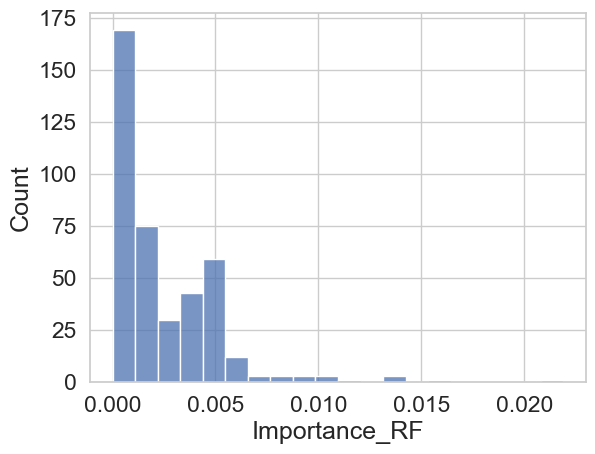

In [ ]:
sns.histplot(fi[fi.columns[1]], bins=20)
plt.show()

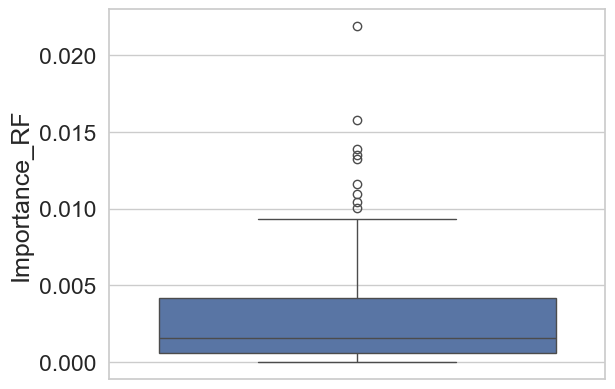

In [18]:
sns.boxplot(fi.Importance_RF)
plt.show()